In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [34]:
iris = iris.drop(iris[iris.species == "virginica"].index)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


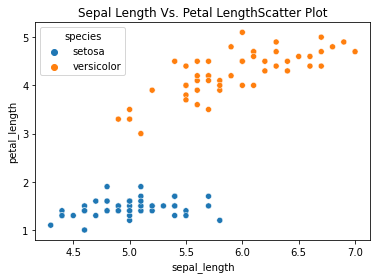

In [4]:
scatplot = sns.scatterplot(data=iris, x="sepal_length", y="petal_length",
                        hue="species").set(title='Sepal Length Vs. Petal LengthScatter Plot')

In [5]:
iris2 = iris[['sepal_length','petal_length','species']]
summary = iris2.groupby(['species']).describe()
summary = summary.transpose()
summary = summary.rename(columns={'species':' '}, inplace=True)
summary

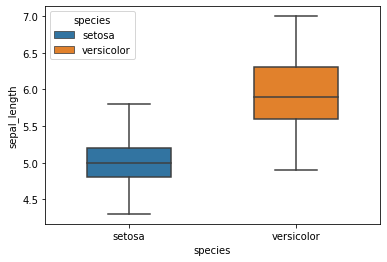

In [33]:
sns.boxplot(data = iris, x = "species", y = "sepal_length",
            dodge=False, hue = "species", width = 0.5);

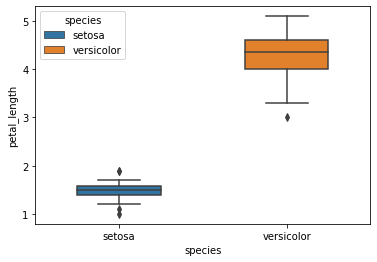

In [26]:
sns.boxplot(data = iris, x = "species", y = "petal_length",
            dodge=False, hue = "species", width = 0.5);

In [7]:
class Perceptron:
    def __init__(self,eta = 0.1, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01,
                             size = 1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [39]:
y = iris.iloc[0:100,4].values
y = np.where(y == 'setosa', -1,1)
X = iris.iloc[0:100, [0,2]].values

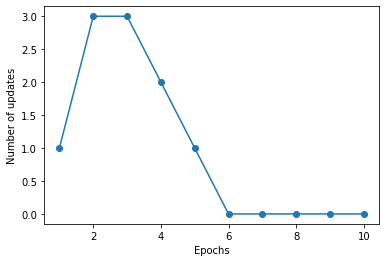

In [41]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [10]:
def pred(sepal_len, petal_len):
    pred_val = ppn.predict([sepal_len,petal_len])
    if pred_val == -1:
        return("Setosa")
    if pred_val == 1:
        return("versicolor")

In [11]:
pred(3.5,2)

'versicolor'